# **Task 1 : Prediction using Supervised ML**
### Problem Statement: Predict the percentage of a student based on the no. of hours studied by the student. 

Name: Vinay Jain 

Position: Data science and Business analytics intern

Organisation: The Sparks Foundation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
X = np.array(s_data.iloc[:, 0].values)
# X = s_data.drop("Scores",axis=1)
y = np.array(s_data.iloc[:, 1].values)

In [ ]:
X.shape,y.shape

((25,), (25,))

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20,), (5,), (20,), (5,))

# Simple Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("MSE for linregress:",mse)
print("MAE for linregress:",mae)

MSE for linregress: 21.598769307217456
MAE for linregress: 4.183859899002982


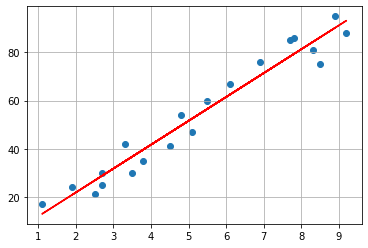

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train.reshape(-1,1),regressor.predict(X_train.reshape(-1, 1)),color="red")
plt.grid()
plt.show()

In [ ]:
x=9.25
a=regressor.predict([[x]])
print("If a student studies for {} hours per day, then he/she will score {}% in exam".format(x,a))

If a student studies for 9.25 hours per day, then he/she will score [[93.69173249]]% in exam


# Methods which can be used apart from Simple Linear Regression
### (Just for learning purpose)

## Linregress

In [ ]:
import scipy
linregress = scipy.stats.linregress(X_train,y_train)
print("Slope:",linregress.slope)
print("coefficient/intercept:",linregress.intercept)
y_pred = linregress.intercept + linregress.slope*X_test
print("Predicted value:",y_pred)
print("Actual value",y_test)

Slope: 9.910656480642237
coefficient/intercept: 2.018160041434683
Predicted value: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Actual value [20 27 69 30 62]


In [ ]:
ypred= linregress.slope*9.25 + linregress.intercept
print("Our model predicted:",ypred,"for 9.25hrs of study hours")

Our model predicted: 93.69173248737538 for 9.25hrs of study hours


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test[3].reshape(-1,1),ypred.reshape(-1,1))
mae = mean_absolute_error(y_test[3].reshape(-1,1),ypred.reshape(-1,1))
print("MSE for linregress:",mse)
print("MAE for linregress:",mae)

MSE for linregress: 4056.636787243388
MAE for linregress: 63.691732487375376


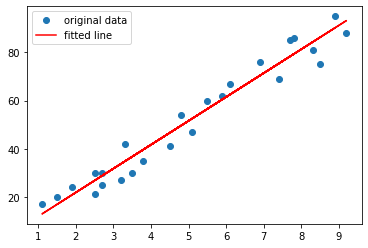

In [ ]:
plt.plot(X, y, 'o', label='original data')
plt.plot(X, linregress.intercept + linregress.slope*X, 'r', label='fitted line')
plt.legend()
plt.show()

## Polyfit

In [ ]:
model = np.polyfit(X_train, y_train, 1)
predict = np.poly1d(model)

In [ ]:
hours_studied = 9.25
print("Predicted value:",predict(hours_studied))

print("Predicted value:",predict(X_test))
print("Actual value",y_test)

Predicted value: 93.69173248737538
Predicted value: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Actual value [20 27 69 30 62]


In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("MSE for Polyfit:",mse)
print("MAE for Polyfit:",mae)

MSE for Polyfit: 21.5987693072174
MAE for Polyfit: 4.183859899002975


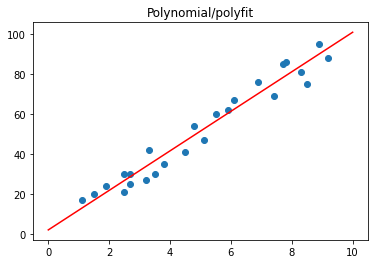

In [ ]:
x_lin_reg = range(0, 11)
y_lin_reg = predict(x_lin_reg)
plt.title('Polynomial/polyfit')
plt.scatter(X, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

## Linalg lstsq

In [ ]:
A = np.vstack([X_train, np.ones(len(X_train))]).T
# print(A)
m, c = np.linalg.lstsq(A, y_train)[0]
print("Slope:",m)
print("Intercept:",c)

Slope: 9.910656480642237
Intercept: 2.0181600414346796


In [ ]:
y_pred= m*X_test + c
print("Predicted values:",y_pred)
print("Actual values:",y_test)

Predicted values: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Actual values: [20 27 69 30 62]


In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("MSE for Polyfit:",mse)
print("MAE for Polyfit:",mae)

MSE for Polyfit: 21.598769307217395
MAE for Polyfit: 4.183859899002977


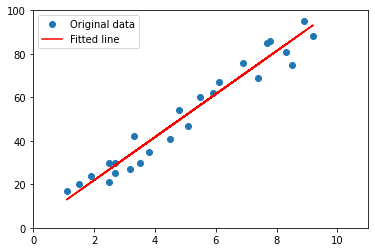

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o', label='Original data')
plt.plot(X, m*X + c, 'r', label='Fitted line')
plt.legend()
plt.axis([0,11,0,100])
plt.show()

In [ ]:
## Curve Fit

In [ ]:
def test(x, a, b): 
    return b*x + a
  
param, param_cov = scipy.optimize.curve_fit(test, X_train, y_train)
y_pred = param[0]+ param[1]*X_test
print("Coefficient and slope",param)
print("Predictions:",y_pred)
print("Actual:",y_test)

from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, y_pred))

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("MSE for Polyfit:",mse)
print("MAE for Polyfit:",mae)

In [ ]:
plt.plot(X_train, y_train, 'o', color ='red', label ="data") 
plt.plot(X_test, y_test, color ='blue', label ="optimized data") 
plt.axis([0,11,0,100])
plt.legend() 
plt.show() 